In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("new.csv",encoding = "ISO-8859-1", nrows= 1000)
data

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://bj.lianjia.com/chengjiao/101091487412....,101091487412,116.354287,40.079237,1111027378213,2016-06-22,152,38,350.0,28281,...,4.0,2005,4,2,0.500,0.0,1.0,0.0,6,39995
996,https://bj.lianjia.com/chengjiao/101091488154....,101091488154,116.383881,39.909637,1111027374196,2016-11-10,292,57,1550.0,118249,...,1.0,2009,4,6,0.333,1.0,0.0,1.0,10,104368
997,https://bj.lianjia.com/chengjiao/101091490260....,101091490260,116.275723,40.046164,1111041084751,2016-09-19,240,23,2650.0,60779,...,4.0,2011,4,6,1.000,1.0,0.0,0.0,8,100306
998,https://bj.lianjia.com/chengjiao/101091490537....,101091490537,116.421081,39.904828,1111027381364,2016-11-26,307,136,910.0,102709,...,4.0,2006,4,6,0.333,1.0,1.0,1.0,1,120447


In [25]:
data.dtypes

url                     object
id                       int64
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                      int64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                  int64
bathRoom                 int64
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage         int64
dtype: object

In [26]:
data.isnull().sum()

url                     0
id                      0
Lng                     0
Lat                     0
Cid                     0
tradeTime               0
DOM                     0
followers               0
totalPrice              0
price                   0
square                  0
livingRoom              0
drawingRoom             0
kitchen                 0
bathRoom                0
floor                   0
buildingType           28
constructionTime        0
renovationCondition     0
buildingStructure       0
ladderRatio             0
elevator                0
fiveYearsProperty       0
subway                  0
district                0
communityAverage        0
dtype: int64

In [27]:
data=data.drop_duplicates()#удаление дубликатов
data = data.drop(columns = ['DOM'])#удалим этот столбец, так как он имеет все одинаковые значения
data = data.drop(columns = ['buildingType'])#никак не коррелирует с нашей меткой

data["elevator"]=data["elevator"].fillna(0)#заполнение пропусков у количественных переменных
data["subway"]=data["subway"].fillna(0)
data["fiveYearsProperty"]=data["fiveYearsProperty"].fillna(0)
data["communityAverage"]=data["communityAverage"].fillna(0)


data = data.replace({np.nan: "Неизвестно"})

In [28]:
data.corr()

,id,Lng,Lat,Cid,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
id,1.000000,-0.006865,-0.006866,-0.042607,-0.071467,0.019244,0.105966,-0.035527,-0.019137,0.038036,0.049990,-0.044209,0.050014,-0.011895,0.037295,0.000694,0.010297,0.035405,0.017511,0.073238
Lng,-0.006865,1.000000,0.090761,-0.189099,0.041030,0.148357,0.098656,0.138012,0.098556,0.119161,-0.056727,0.149405,0.001796,0.121414,0.022239,0.136531,0.030085,0.101492,0.208331,0.100339
Lat,-0.006866,0.090761,1.000000,-0.078205,-0.174277,-0.060683,-0.157540,0.046354,0.053363,0.019473,-0.040629,0.039141,-0.108705,-0.112421,0.034080,-0.107741,-0.040174,-0.149506,0.331378,-0.159650
Cid,-0.042607,-0.189099,-0.078205,1.000000,-0.063280,0.019264,-0.106254,0.087588,0.075658,0.088621,0.020881,0.085214,-0.042576,0.073132,0.107976,0.025761,-0.165713,-0.112545,0.004840,-0.111121
followers,-0.071467,0.041030,-0.174277,-0.063280,1.000000,-0.133655,0.097879,-0.241738,-0.150045,-0.107966,0.030995,-0.201273,0.068771,-0.123157,-0.132542,-0.103044,0.111517,0.093945,-0.055580,0.061546
totalPrice,0.019244,0.148357,-0.060683,0.019264,-0.133655,1.000000,0.515687,0.736877,0.526226,0.451920,0.188329,0.595412,0.137500,0.180478,0.508763,0.183229,-0.027426,0.109371,0.069946,0.559138
price,0.105966,0.098656,-0.157540,-0.106254,0.097879,0.515687,1.000000,-0.074724,-0.081344,-0.048403,0.056599,-0.048796,0.198317,0.111418,0.023283,0.151452,0.007319,0.352459,0.088516,0.904047
square,-0.035527,0.138012,0.046354,0.087588,-0.241738,0.736877,-0.074724,1.000000,0.772794,0.664779,0.209421,0.790437,-0.011193,0.082055,0.564344,0.033333,-0.005568,-0.150806,0.057483,0.024602
livingRoom,-0.019137,0.098556,0.053363,0.075658,-0.150045,0.526226,-0.081344,0.772794,1.000000,0.625736,0.183596,0.687113,-0.023765,-0.156368,0.443487,-0.210764,0.057912,-0.204548,0.097492,-0.025598
drawingRoom,0.038036,0.119161,0.019473,0.088621,-0.107966,0.451920,-0.048403,0.664779,0.625736,1.000000,0.280776,0.621565,-0.018500,-0.054681,0.423439,-0.093624,0.043672,-0.205007,0.077723,-0.020307


In [29]:
#cтолбцы с количественными данными
quantitative_columns = [i for i in data.columns if data[i].dtypes=='int64' or data[i].dtypes=='float64']
num_data = data[quantitative_columns]

In [30]:
X = data[quantitative_columns]
X =X.drop(columns = ['elevator'])
y = data['elevator']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
from fedot.api.main import Fedot

model = Fedot(problem='classification', seed=5, timeout=1, show_progress=True, max_pipeline_fit_time=1)
model.fit(features=X_train, target=y_train)

2023-01-09 23:53:55,410 - ApiComposer - Initial pipeline was fitted in 0.3 sec.
2023-01-09 23:53:55,418 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['bernb', 'dt', 'knn', 'lgbm', 'logit', 'mlp', 'qda', 'rf', 'scaling', 'normalization', 'pca', 'fast_ica', 'poly_features', 'isolation_forest_class', 'resample'].
2023-01-09 23:53:55,452 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-01-09 23:54:32,157 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [00:36<?, ?gen/s]

2023-01-09 23:54:32,164 - ApiComposer - Hyperparameters tuning started with 0 min. timeout


2023-01-09 23:54:33,272 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [rf, resample, scaling]}
rf - {'n_jobs': 1}
resample - {'balance': 'expand_minority', 'replace': False, 'balance_ratio': 1}
scaling - {} 
Initial metric: 0.960
  0%|          | 26/100000 [00:23<40:16:41,  1.45s/trial, best loss: -0.9549648]
2023-01-09 23:55:12,412 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [rf, resample, scaling]}
rf - {'n_jobs': 1, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 0.24825385029991115, 'min_samples_leaf': 7, 'min_samples_split': 4}
resample - {'balance': 'expand_minority', 'replace': False, 'balance_ratio': 1}
scaling - {}
2023-01-09 23:55:12,418 - PipelineTuner - Final metric: 0.951
2023-01-09 23:55:12,428 - ApiComposer - Hyperparameters tuning finished
2023-01-09 23:55:12,817 - ApiComposer - Model generation finished
2023-01-09 23:55:13,093 - FEDOT logger - Final pipeline was fitted
2023-01-09 23:55:13,098 - FEDOT logger 

{'depth': 3, 'length': 3, 'nodes': [rf, resample, scaling]}

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve,f1_score

print(f"Оценка качества модели по метрике F1-score: {f1_score(y_test, model.predict(X_test))}")
print(f"Оценка качества модели по метрике ROC AUC: {roc_auc_score(y_test, model.predict(X_test))}")

Оценка качества модели по метрике F1-score: 0.9322709163346614
Оценка качества модели по метрике ROC AUC: 0.9126847157803907


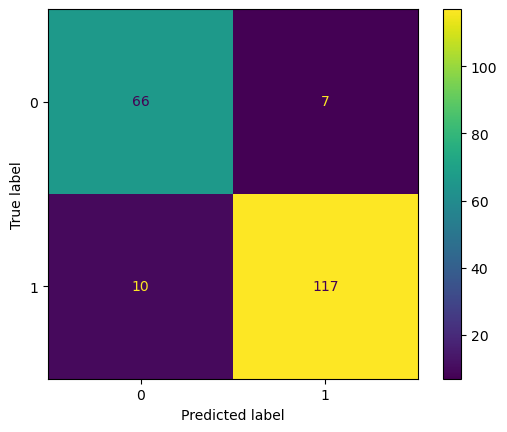

In [34]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.show()

#### ROC-Curve

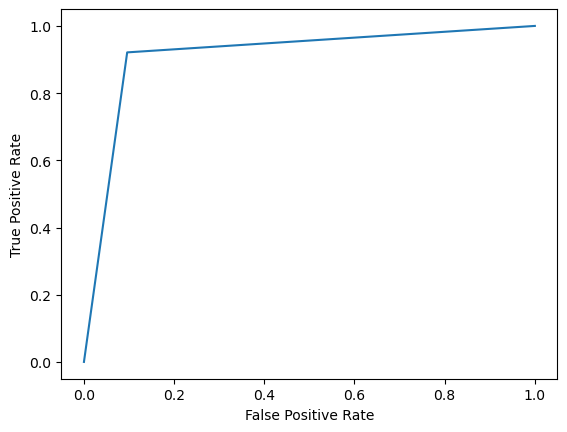

In [35]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, model.predict(X_test))

#### Построим модель классификации без AutoML

In [36]:
count_canceled = data['elevator'].value_counts()
count_canceled

1.0    626
0.0    374
Name: elevator, dtype: int64

<BarContainer object of 2 artists>

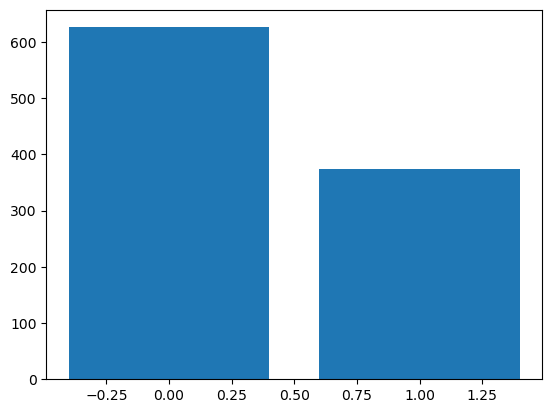

In [37]:
plt.bar(x = [0,1],height = [count_canceled.values[0],count_canceled.values[1]])

##### Видим, что значения метки не сбалансированны, сделаем балансировку

#### Будем использовать метод SMOTE для балансировки

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

In [39]:
#тестовые и тренировочные выборки
X_train, X_test, y_train, y_test = train_test_split(
X_res, y_res, test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
print(f"Оценка качества модели по метрике F1-score: {f1_score(y_test, model.predict(X_test))}")
print(f"Оценка качества модели по метрике ROC AUC: {roc_auc_score(y_test, model.predict(X_test))}")

Оценка качества модели по метрике F1-score: 0.9558232931726908
Оценка качества модели по метрике ROC AUC: 0.9562222222222222


#### Confusion matrix

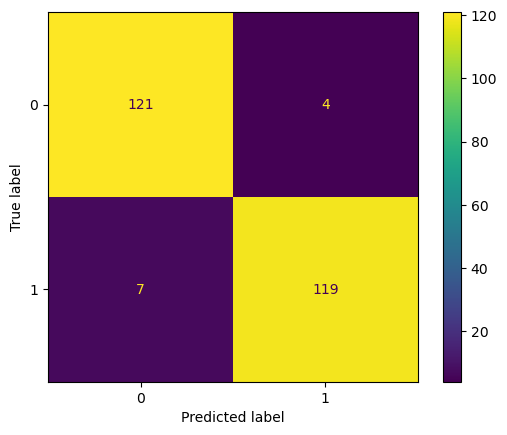

In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

#### ROC-Curve

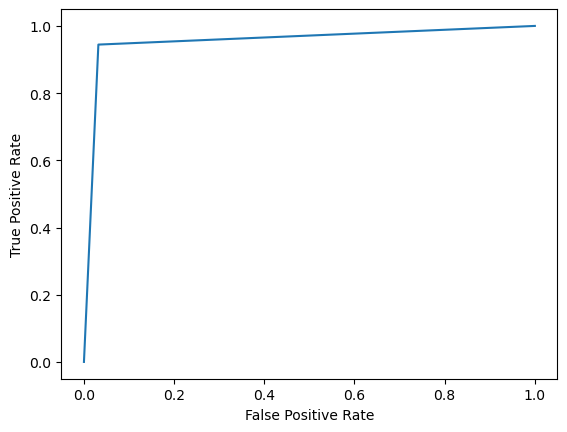

In [43]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y_test, model.predict(X_test))

### В итоге моя модель оказалась лучше, за счет того, что я провел балансировку данных